La distribución exponencial viene dada por:
$
\lambda e^{-\lambda x}
$
Particularmente tomaremos $\lambda=\frac{5}{h}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

In [3]:
#Definimos la PDF.
def pdf(x,l=5):
    pdf = np.exp(-x*l)*l
    return prob

Luego, la CDF viene dada por:

$
\int_{0}^{x}\lambda e^{-\lambda x'} dx' = 1-e^{-\lambda x}
$

In [4]:
def cdf(x,l=5):
    cdf = 1-np.exp(-x*l)
    return cdf

Despejamos su inversa:

$
y=1-e^{-\lambda x}\leftrightarrow x = -\frac{\ln(1-y)}{\lambda}
$

In [5]:
def inv(y,l=5):
    inv = -np.log(1-y)/l
    return inv

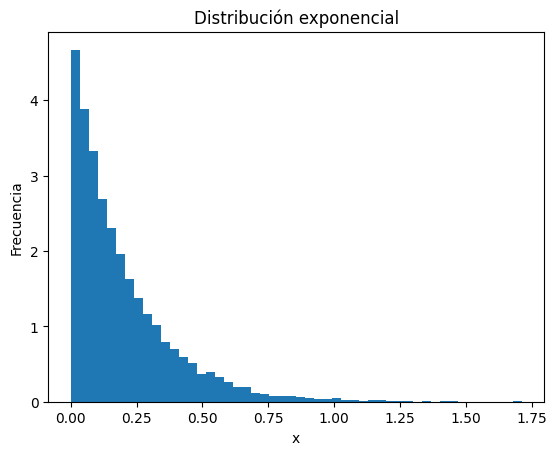

In [6]:
y=np.random.rand(10000)
x=inv(y)

plt.hist(x,bins=50,density=True)
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.title('Distribución exponencial')
plt.show()

Vemos que efectivamente reproduce la distribución, entonces ahora realizaremos un bucle que reproduzca n veces el experimento:

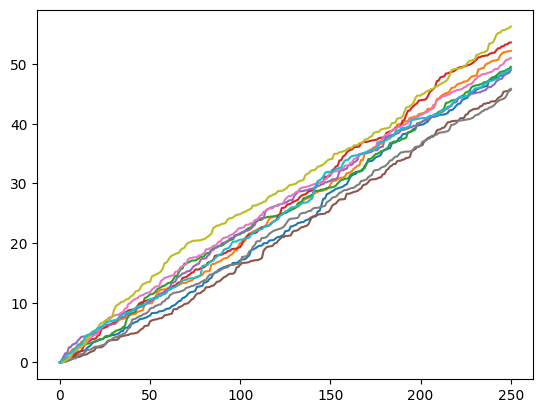

In [7]:
n=10
N=250

for i in range(n):
    x = np.random.rand(N)
    x = inv(x)
    x = np.append(0,x)
    x = np.cumsum(x)
    plt.plot(x)


plt.show()

Ahora, quiero saber cuantos eventos ocurrieron pasadas 3 horas y los grafico:

[12. 15. 23. ... 13. 15. 18.]


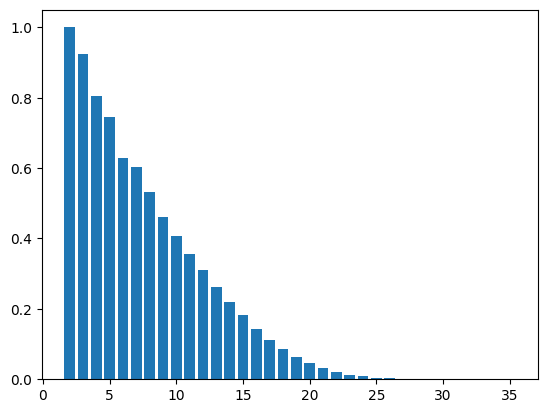

In [8]:
n_2=10
N_2=250
exp=100000
eventos_3h = np.zeros(exp)

for i in range(exp):
    x = np.random.rand(N)
    x = inv(x)
    x = np.append(0,x)
    x = np.cumsum(x)
    j, = np.where(x>3)
    eventos_3h[i] = j[0]-1

c,frec = np.unique(eventos_3h,return_counts=True)
v = frec/np.cumsum(frec)
plt.bar(c,v)
print(eventos_3h)

Vemos que se aproxima a una distribución de Poisson, por lo tanto repitamos el experimento pero grafiquemos encima la distribución esperada para este problema: $\frac{e^{-\lambda}\lambda^k}{k!}$ con $\lambda=15$

Dado que nuestro experimento es a una tasa de 5 por hora durante 3 horas

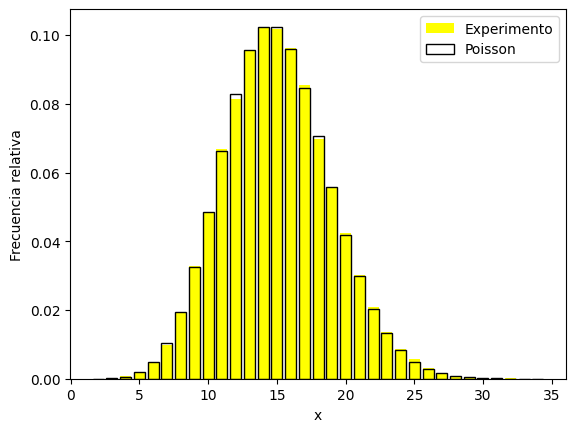

In [13]:
n_2=10
N_2=250
exp=100000
eventos_3h = np.zeros(exp)

poisson = sp.poisson(mu=15)


for i in range(exp):
    x = np.random.rand(N)
    x = inv(x)
    x = np.append(0,x)
    x = np.cumsum(x)
    j, = np.where(x>3)
    eventos_3h[i] = j[0]-1

c,frec = np.unique(eventos_3h,return_counts=True)
v = frec/np.sum(frec)
plt.bar(c,v, color='yellow', label='Experimento')
plt.bar(c,poisson.pmf(c), color='black', label='Poisson', facecolor='none', edgecolor='black')
plt.xlabel('x')
plt.ylabel('Frecuencia relativa')
plt.legend()
plt.show()

Con lo que vemos que se aproxima a una distribución de Poisson.